In [1]:
setwd("~/Upd-Germline-Genomics")

source("_targets.R")

Loading required package: viridisLite


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
library(GenomicRanges)

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:dplyr’:

    first, rename


The following object is masked from ‘package:utils’:

    findMatches


The following objects are mask

In [3]:
tar_load(chic.tile.diameter_500_chr)
tar_load(chromosome_pericetromere_label)

subset(chic.tile.diameter_500_chr, seqnames == "rDNA")[372:767] %>%
  reduce() %>%
  ranges()

analyze_loci <- c(
  seqnames(chic.tile.diameter_500_chr) %in% names(chr.lengths)
) %>%
  replace(
    which(seqnames(chic.tile.diameter_500_chr) == "rDNA")[372:767],
    TRUE
  )
seqnames <- seqnames(chic.tile.diameter_500_chr)[analyze_loci] %>%
  droplevels()
seqnames
gr <- chic.tile.diameter_500_chr[analyze_loci]
gr$region <- seqnames %>%
  as.character() %>%
  paste0(
    rep("", length(.)) %>%
      replace(
        to(findOverlaps(chromosome_pericetromere_label, gr)),
        "C"
      )
  )
table(gr$region)
gr$region <- gr$region %>%
  factor(c("2L", "2LC", "2RC", "2R", "3L", "3LC", "3RC", "3R", "4", "X", "Y", "rDNA"))

IRanges object with 1 range and 0 metadata columns:
          start       end     width
      <integer> <integer> <integer>
  [1]     36901     76900     40000

factor-Rle of length 1375880 with 8 runs
  Lengths: 235138 252870 281103 320794  13482 235423  36674    396
  Values :   2L     2R     3L     3R     4      X      Y      rDNA
Levels(8): 2L 2R 3L 3R 4 X Y rDNA


    2L    2LC     2R    2RC     3L    3LC     3R    3RC      4   rDNA      X 
221922  13216 196354  56516 231539  49564 278500  42294  13482    396 235423 
     Y 
 36674 

In [4]:
subset(chic.tile.diameter_500_chr, seqnames == "rDNA")[372:767] %>%
  as.data.frame() %>%
  as_tibble() %>%
  dplyr::slice(c(1, nrow(.)))

seqnames,start,end,width,strand
<fct>,<int>,<int>,<int>,<fct>
rDNA,36901,37400,500,*
rDNA,76401,76900,500,*


In [5]:
subset(chic.tile.diameter_500_chr, seqnames == "rDNA")[-c(1:371)] %>%
  as.data.frame() %>%
  as_tibble() %>%
  dplyr::slice(c(1, nrow(.)))

seqnames,start,end,width,strand
<fct>,<int>,<int>,<int>,<fct>
rDNA,36901,37400,500,*
rDNA,76687,76973,287,*


Loading required package: gridExtra


Attaching package: ‘gridExtra’


The following object is masked from ‘package:BiocGenerics’:

    combine


The following object is masked from ‘package:dplyr’:

    combine


Loading required package: ggplot2

Warning message:
“Removed 56 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 56 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 23 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 23 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 4 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 4 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 1 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 1 rows containing non-finite values (`stat_boxplot()`).”


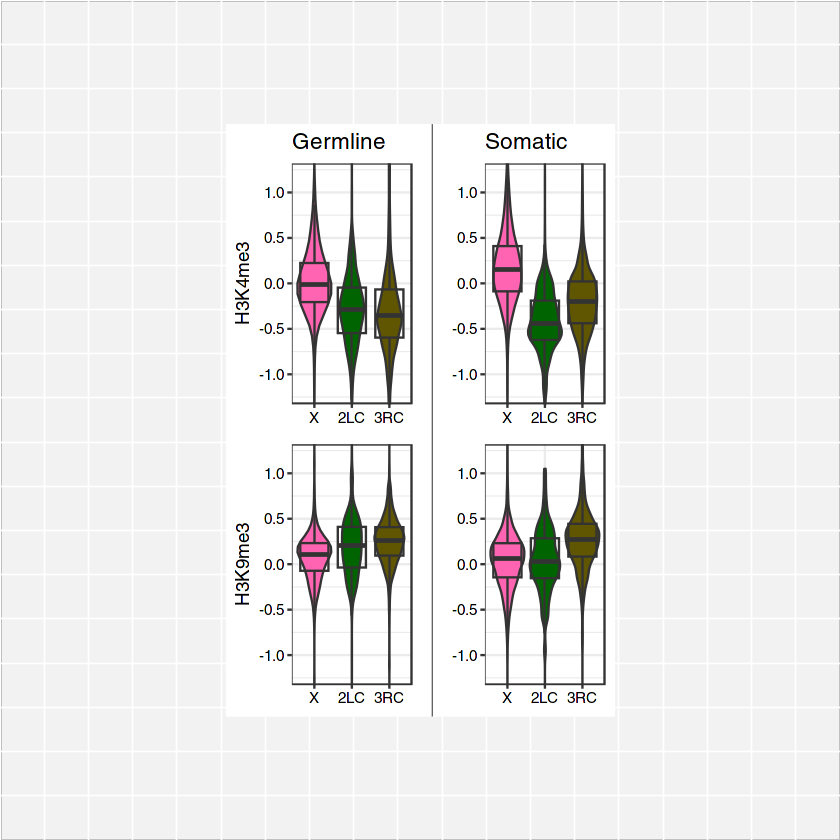

In [6]:
library(egg)
library(grid)
library(gtable)

tar_load(enriched.chromosomes.data_H3K4_Germline)
tar_load(enriched.chromosomes.data_H3K4_Somatic)
tar_load(enriched.chromosomes.data_H3K9_Germline)
tar_load(enriched.chromosomes.data_H3K9_Somatic)

gg <- ggplot(
  enriched.chromosomes.data_H3K4_Germline,
  aes(label, L2FC, fill=label)
) +
  geom_violin(data = \(data) data %>% subset(label %in% c("2LC", "3RC", "X"))) +
  geom_boxplot(data = \(data) data %>% subset(label %in% c("2LC", "3RC", "X")), outlier.shape = NA, fill = "transparent") +
  scale_fill_manual(values = arm.colors) +
  coord_cartesian(NULL, c(-1.2, 1.2)) +
  labs(x = NULL) +
  theme(
    aspect.ratio = 2,
    legend.position = "none",
  )

grob <- cbind(
  rbind(
    set_panel_size(
      gg + labs(title = "Germline", y = "H3K4me3"),
      w = unit(1, "in"),
      h = unit(2, "in")
    ),
    set_panel_size(
      gg %>%
        replace(names(.) == "data", list(enriched.chromosomes.data_H3K9_Germline)) %>%
        `+`(labs(y = "H3K9me3")),
      w = unit(1, "in"),
      h = unit(2, "in")
    )
  ),
  rbind(
    set_panel_size(
      gg %>%
        replace(names(.) == "data", list(enriched.chromosomes.data_H3K4_Somatic)) %>%
        `+`(labs(title = "Somatic", y = NULL)),
      w = unit(1, "in"),
      h = unit(2, "in")
    ),
    set_panel_size(
      gg %>%
        replace(names(.) == "data", list(enriched.chromosomes.data_H3K9_Somatic)) %>%
        `+`(labs(y = NULL)),
      w = unit(1, "in"),
      h = unit(2, "in")
    )
  )
) %>%
  gtable_add_grob(
    polylineGrob(x = c(0, 0)),
    l = 10,
    t = 1,
    b = 24
  )
grob$widths[9:10] <- unit(12, "pt")
plot(grob)

In [7]:
tar_load(chic.experiment.quantify_H3K4_Germline_peakcalling.broad_chr)
tar_load(chic.experiment.quantify_H3K4_Somatic_peakcalling.broad_chr)
chic.experiment.quantify_H3K4_Germline_peakcalling.broad_chr <-
  chic.experiment.quantify_H3K4_Germline_peakcalling.broad_chr[analyze_loci]
seqlevels(chic.experiment.quantify_H3K4_Germline_peakcalling.broad_chr) <-
  levels(seqnames)
seqnames(chic.experiment.quantify_H3K4_Germline_peakcalling.broad_chr) <-
  seqnames
chic.experiment.quantify_H3K4_Somatic_peakcalling.broad_chr <-
  chic.experiment.quantify_H3K4_Somatic_peakcalling.broad_chr[analyze_loci]
seqlevels(chic.experiment.quantify_H3K4_Somatic_peakcalling.broad_chr) <-
  levels(seqnames)
seqnames(chic.experiment.quantify_H3K4_Somatic_peakcalling.broad_chr) <-
  seqnames

tar_load(chic.experiment.quantify_H3K27_Germline_peakcalling.broad_chr)
tar_load(chic.experiment.quantify_H3K27_Somatic_peakcalling.broad_chr)
chic.experiment.quantify_H3K27_Germline_peakcalling.broad_chr <-
  chic.experiment.quantify_H3K27_Germline_peakcalling.broad_chr[analyze_loci]
seqlevels(chic.experiment.quantify_H3K27_Germline_peakcalling.broad_chr) <-
  levels(seqnames)
seqnames(chic.experiment.quantify_H3K27_Germline_peakcalling.broad_chr) <-
  seqnames
chic.experiment.quantify_H3K27_Somatic_peakcalling.broad_chr <-
  chic.experiment.quantify_H3K27_Somatic_peakcalling.broad_chr[analyze_loci]
seqlevels(chic.experiment.quantify_H3K27_Somatic_peakcalling.broad_chr) <-
  levels(seqnames)
seqnames(chic.experiment.quantify_H3K27_Somatic_peakcalling.broad_chr) <-
  seqnames

tar_load(chic.experiment.quantify_H3K9_Germline_peakcalling.broad_chr)
tar_load(chic.experiment.quantify_H3K9_Somatic_peakcalling.broad_chr)
chic.experiment.quantify_H3K9_Germline_peakcalling.broad_chr <-
  chic.experiment.quantify_H3K9_Germline_peakcalling.broad_chr[analyze_loci]
seqlevels(chic.experiment.quantify_H3K9_Germline_peakcalling.broad_chr) <-
  levels(seqnames)
seqnames(chic.experiment.quantify_H3K9_Germline_peakcalling.broad_chr) <-
  seqnames
chic.experiment.quantify_H3K9_Somatic_peakcalling.broad_chr <-
  chic.experiment.quantify_H3K9_Somatic_peakcalling.broad_chr[analyze_loci]
seqlevels(chic.experiment.quantify_H3K9_Somatic_peakcalling.broad_chr) <-
  levels(seqnames)
seqnames(chic.experiment.quantify_H3K9_Somatic_peakcalling.broad_chr) <-
  seqnames

In [ ]:
chic.experiment.quantify_H3K4_Germline_peakcalling.broad_chr %>%
  subset(seqnames(.) == "rDNA")

GRanges object with 396 ranges and 9 metadata columns:
        seqnames      ranges strand | score.molH3 score.molH3K4me3  score.R1
           <Rle>   <IRanges>  <Rle> |   <numeric>        <numeric> <numeric>
    [1]     rDNA 36901-37400      * |    0.762774         0.956435   1.12129
    [2]     rDNA 37001-37500      * |    0.879280         1.075774   1.23525
    [3]     rDNA 37101-37600      * |    0.589868         0.665586   1.23667
    [4]     rDNA 37201-37700      * |    0.546928         0.610731   1.24916
    [5]     rDNA 37301-37800      * |    0.546928         0.610731   1.24916
    ...      ...         ...    ... .         ...              ...       ...
  [392]     rDNA 76001-76500      * |    0.878388         0.764779  0.951615
  [393]     rDNA 76101-76600      * |    0.878388         0.764779  0.951615
  [394]     rDNA 76201-76700      * |    0.878388         0.764779  0.951615
  [395]     rDNA 76301-76800      * |    0.000000         0.000000  1.000000
  [396]     rDNA 7640

In [9]:
chic.experiment.quantify_H3K4_Germline_peakcalling.broad_chr <-
  chic.experiment.quantify_H3K4_Germline_peakcalling.broad_chr %>%
    subset(seqnames(.) != "rDNA")
chic.experiment.quantify_H3K4_Somatic_peakcalling.broad_chr <-
  chic.experiment.quantify_H3K4_Somatic_peakcalling.broad_chr %>%
    subset(seqnames(.) != "rDNA")

chic.experiment.quantify_H3K27_Germline_peakcalling.broad_chr <-
  chic.experiment.quantify_H3K27_Germline_peakcalling.broad_chr %>%
    subset(seqnames(.) != "rDNA")
chic.experiment.quantify_H3K27_Somatic_peakcalling.broad_chr <-
  chic.experiment.quantify_H3K27_Somatic_peakcalling.broad_chr %>%
    subset(seqnames(.) != "rDNA")

chic.experiment.quantify_H3K9_Germline_peakcalling.broad_chr <-
  chic.experiment.quantify_H3K9_Germline_peakcalling.broad_chr %>%
    subset(seqnames(.) != "rDNA")
chic.experiment.quantify_H3K9_Somatic_peakcalling.broad_chr <-
  chic.experiment.quantify_H3K9_Somatic_peakcalling.broad_chr %>%
    subset(seqnames(.) != "rDNA")

gr <- gr %>% subset(seqnames(.) != "rDNA")

In [10]:
write(deparse(arm.colors), stdout())
arm.colors <- c(
  "2L" = "#22B700", "2LC" = "#006500", "2RC" = "#006E50", "2R" = "#00C19B",  "3L" = "#EC823A", "3LC" = "#8B3B00", "3RC" = "#605500", "3R" = "#B1A100",  "4" = "#DE70F9", X = "#FF64B2", Y = "#3FA1FF",
  rDNA = "#79d2ff"
)
write(deparse(arm.colors), stdout())

c("2L" = "#22B700", "2LC" = "#006500", "2RC" = "#006E50", "2R" = "#00C19B", 
"3L" = "#EC823A", "3LC" = "#8B3B00", "3RC" = "#605500", "3R" = "#B1A100", 
"4" = "#DE70F9", X = "#FF64B2", Y = "#3FA1FF")
c("2L" = "#22B700", "2LC" = "#006500", "2RC" = "#006E50", "2R" = "#00C19B", 
"3L" = "#EC823A", "3LC" = "#8B3B00", "3RC" = "#605500", "3R" = "#B1A100", 
"4" = "#DE70F9", X = "#FF64B2", Y = "#3FA1FF", rDNA = "#79d2ff"
)


In [11]:
data <- with(
  elementMetadata(gr),
  list(
    H3K4 = tibble(
      region,
      GSC = chic.experiment.quantify_H3K4_Germline_peakcalling.broad_chr$L2FC,
      CySC = chic.experiment.quantify_H3K4_Somatic_peakcalling.broad_chr$L2FC,
    ),
    H3K27 = tibble(
      region,
      GSC = chic.experiment.quantify_H3K27_Germline_peakcalling.broad_chr$L2FC,
      CySC = chic.experiment.quantify_H3K27_Somatic_peakcalling.broad_chr$L2FC,
    ),
    H3K9 = tibble(
      region,
      GSC = chic.experiment.quantify_H3K9_Germline_peakcalling.broad_chr$L2FC,
      CySC = chic.experiment.quantify_H3K9_Somatic_peakcalling.broad_chr$L2FC,
    )
  )
)

Warning message:
“Removed 81563 rows containing non-finite values (`stat_bin2d()`).”
Warning message:
“Removed 92 rows containing missing values (`geom_tile()`).”


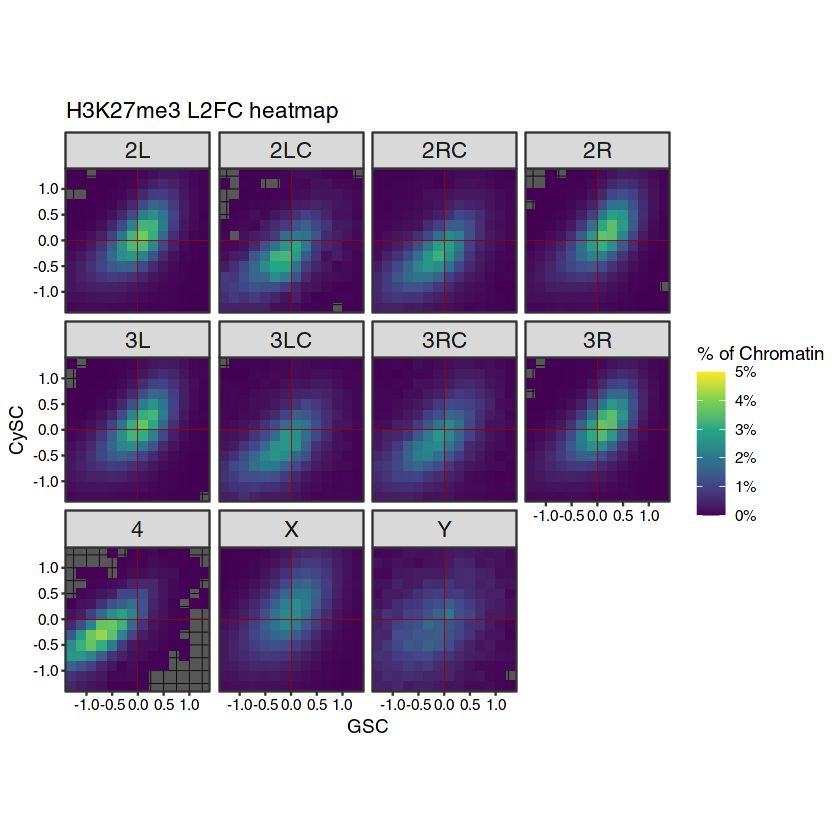

In [12]:
library(ggplot2)
ggplot(subset(data$H3K27), aes(GSC, CySC, fill=after_stat(density))) +
  geom_bin2d(data = \(data) data %>% subset(between(abs(GSC), 1e-6, 9.9) & between(abs(CySC), 1e-6, 9.9)), binwidth = 0.2) +
  facet_wrap(vars(region)) +
  scale_fill_viridis_c("% of Chromatin", limits=c(0, 0.05), oob=scales::squish, labels=scales::percent) +
  annotate(
    "segment",
    c(-Inf, 0),
    c(0, -Inf),
    xend = c(Inf, 0),
    yend = c(0, Inf),
    color = "#990000",
    linewidth = 0.5 * 25.4 / 72,
  ) +
  scale_x_continuous(limits = c(-1.401, 1.401), expand=c(0, 0)) +
  scale_y_continuous(limits = c(-1.401, 1.401), expand=c(0, 0)) +
  coord_cartesian(c(-1.4,1.4), c(-1.4,1.4), clip="off") +
  labs(title = "H3K27me3 L2FC heatmap") +
  theme(
    aspect.ratio = 1,
    panel.background = element_rect(fill = "#575757"),
    panel.grid = element_line(color = "black", linewidth = 0.5 * 25.4 / 72),
    panel.grid.minor = element_line(color = "black", linewidth = 0.5 * 25.4 / 72),
  )

In [13]:
with(
  data$H3K4,
  mean(
    (between(abs(GSC), 1.4, 9.9) | between(abs(CySC), 1.4, 9.9)) &
      between(abs(GSC), 1e-6, 9.9) &
      between(abs(CySC), 1e-6, 9.9)
  )
)

[1] 0.05697558

[1] 1.042217


Warning message:
“Removed 8951 rows containing non-finite values (`stat_bin2d()`).”
Warning message:
“Removed 20 rows containing missing values (`geom_tile()`).”


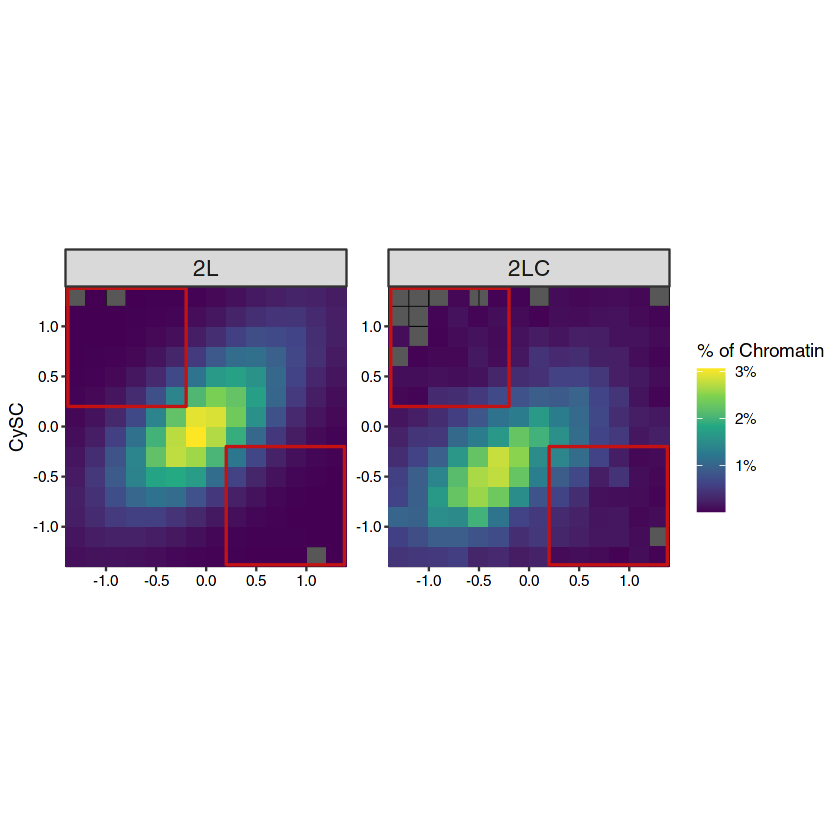

In [14]:
library(ggplot2)
data_H3K4 <- subset(
  data$H3K4,
  region %in% c("2L", "2LC") &
    between(abs(GSC), 1e-6, 9.9) &
    between(abs(CySC), 1e-6, 9.9)
)
plot_limits <- 1.401
annotate_polygon <- 1.38
correction_factor <- with(
  data_H3K4,
  1 / mean(between(GSC, -plot_limits, plot_limits) & between(CySC, -plot_limits, plot_limits))
)
print(correction_factor)
gg <- ggplot(data_H3K4, aes(GSC, CySC, fill = after_stat(density))) +
  geom_bin2d(binwidth = 0.2) +
  facet_wrap(vars(region), scales = "free") +
  scale_fill_viridis_c(
    "% of Chromatin",
    breaks = c(0.01, 0.02, 0.03) / correction_factor,
    labels = \(v) scales::percent(round(v * correction_factor, 2))
  ) +
  annotate(
    "polygon",
    c(-annotate_polygon, -0.2, -0.2, -annotate_polygon),
    c(annotate_polygon, annotate_polygon, 0.2, 0.2),
    fill = "transparent",
    color = "#c41212",
    linewidth = 2 * 25.4 / 72,
  ) +
  annotate(
    "polygon",
    c(annotate_polygon, 0.2, 0.2, annotate_polygon),
    c(-annotate_polygon, -annotate_polygon, -0.2, -0.2),
    fill = "transparent",
    color = "#c41212",
    linewidth = 2 * 25.4 / 72,
  ) +
  scale_x_continuous(
    limits = c(-plot_limits, plot_limits), expand=c(0, 0),
    minor_breaks = seq(-1.4, 1.4, by=0.2)
  ) +
  scale_y_continuous(
    limits = c(-plot_limits, plot_limits), expand=c(0, 0),
    minor_breaks = seq(-1.4, 1.4, by=0.2)
  ) +
  coord_cartesian(c(-1.4,1.4), c(-1.4,1.4), clip="off") +
  labs(x = NULL) +
  theme(
    aspect.ratio = 1,
    panel.background = element_rect(fill = "#575757"),
    panel.grid = element_line(color = "black", linewidth = 0.5 * 25.4 / 72),
    panel.grid.minor = element_line(color = "black", linewidth = 0.5 * 25.4 / 72),
    panel.border = element_blank(),
  )
gg

[1] 1.046535


Warning message:
“Removed 9825 rows containing non-finite values (`stat_bin2d()`).”
Warning message:
“Removed 13 rows containing missing values (`geom_tile()`).”
Warning message:
“Removed 9825 rows containing non-finite values (`stat_bin2d()`).”
Warning message:
“Removed 13 rows containing missing values (`geom_tile()`).”


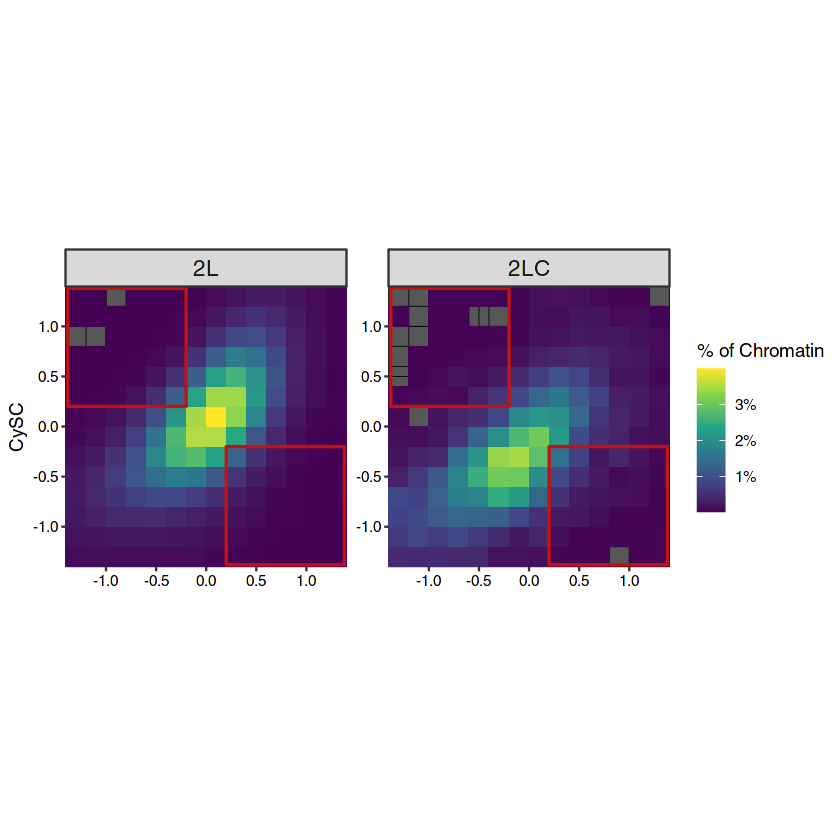

In [15]:
library(ggplot2)
data_H3K27 <- subset(
  data$H3K27,
  region %in% c("2L", "2LC") &
    between(abs(GSC), 1e-6, 9.9) &
    between(abs(CySC), 1e-6, 9.9)
)
plot_limits <- 1.401
annotate_polygon <- 1.38
correction_factor <- with(
  data_H3K27,
  1 / mean(between(GSC, -plot_limits, plot_limits) & between(CySC, -plot_limits, plot_limits))
)
print(correction_factor)
gg_H3K27 <- ggplot(data_H3K27, aes(GSC, CySC, fill = after_stat(density))) +
  geom_bin2d(binwidth = 0.2) +
  facet_wrap(vars(region), scales = "free") +
  scale_fill_viridis_c(
    "% of Chromatin",
    breaks = c(0.01, 0.02, 0.03) / correction_factor,
    labels = \(v) scales::percent(round(v * correction_factor, 2))
  ) +
  annotate(
    "polygon",
    c(-annotate_polygon, -0.2, -0.2, -annotate_polygon),
    c(annotate_polygon, annotate_polygon, 0.2, 0.2),
    fill = "transparent",
    color = "#c41212",
    linewidth = 2 * 25.4 / 72,
  ) +
  annotate(
    "polygon",
    c(annotate_polygon, 0.2, 0.2, annotate_polygon),
    c(-annotate_polygon, -annotate_polygon, -0.2, -0.2),
    fill = "transparent",
    color = "#c41212",
    linewidth = 2 * 25.4 / 72,
  ) +
  scale_x_continuous(
    limits = c(-plot_limits, plot_limits), expand=c(0, 0),
    minor_breaks = seq(-1.4, 1.4, by=0.2)
  ) +
  scale_y_continuous(
    limits = c(-plot_limits, plot_limits), expand=c(0, 0),
    minor_breaks = seq(-1.4, 1.4, by=0.2)
  ) +
  coord_cartesian(c(-1.4,1.4), c(-1.4,1.4), clip="off") +
  labs(x = NULL) +
  theme(
    aspect.ratio = 1,
    panel.background = element_rect(fill = "#575757"),
    panel.grid = element_line(color = "black", linewidth = 0.5 * 25.4 / 72),
    panel.grid.minor = element_line(color = "black", linewidth = 0.5 * 25.4 / 72),
    panel.border = element_blank(),
  )
grobK27 <- set_panel_size(gg_H3K27, w = unit(1.5, "in"), h = unit(1.5, "in"))
gg_H3K27

In [16]:
args(element_text)

function (family = NULL, face = NULL, colour = NULL, size = NULL, 
    hjust = NULL, vjust = NULL, angle = NULL, lineheight = NULL, 
    color = NULL, margin = NULL, debug = NULL, inherit.blank = FALSE) 
NULL

In [26]:
library(egg)
library(grid)
pdf("illustrations/Histone-L2FC-Heatmap.pdf", w=8.5, h=11)
ggfull <- gg + facet_wrap(vars(mark), scales = "free")
ggfull$data <- bind_rows(
  setNames(data, c("H3K4me3", "H3K27me3", "H3K9me3")),
  .id = "mark"
) %>%
  mutate(mark = mark %>% factor(c("H3K4me3", "H3K27me3", "H3K9me3"))) %>%
  subset(
    between(abs(GSC), 1e-6, 9.9) &
      between(abs(CySC), 1e-6, 9.9)
  )
plot_region_gg <- function(n) {
  gg <- ggfull
  gg$data <- gg$data %>% subset(region == n)
  correction_factor <- with(
    gg$data,
    1 / mean(between(GSC, -plot_limits, plot_limits) & between(CySC, -plot_limits, plot_limits))
  )
  gg <- gg +
    scale_fill_viridis_c(
      "% of Chromatin",
      labels = \(v) scales::percent(round(v * correction_factor, 2))
    ) +
    labs(
      y = n
    ) +
    theme(
      axis.title.y = element_text(angle = 0, vjust = 0.5, face = "bold")
    )
}
grid.draw(
  rbind(
    plot_region_gg("2L") %>%
      set_panel_size(w = unit(1.5, "in"), h = unit(1.5, "in")),
    plot_region_gg("2LC") %>%
      set_panel_size(w = unit(1.5, "in"), h = unit(1.5, "in")),
    plot_region_gg("2RC") %>%
      set_panel_size(w = unit(1.5, "in"), h = unit(1.5, "in"))
  )
)
dev.off()

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Warning message:
“Removed 17009 rows containing non-finite values (`stat_bin2d()`).”
Warning message:
“Removed 31 rows containing missing values (`geom_tile()`).”
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Warning message:
“Removed 2663 rows containing non-finite values (`stat_bin2d()`).”
Warning message:
“Removed 5 rows containing missing values (`geom_tile()`).”
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Warning message:
“Removed 11864 rows containing non-finite values (`stat_bin2d()`).”
Warning message:
“Removed 13 rows containing missing values (`geom_tile()`).”


png 
  2

In [56]:

strip_plot_scale_y <- scale_y_continuous(
    limits = c(-plot_limits, plot_limits), expand=c(0, 0),
    minor_breaks = seq(-1.4, 1.4, by=0.2),
    labels = format_nozero,
    sec.axis = sec_axis(identity, "C")
  )
strip_plot_scale_y$secondary.axis

<ggproto object: Class AxisSecondary, gg>
    axis: NULL
    break_info: function
    breaks: waiver
    create_scale: function
    detail: 1000
    empty: function
    guide: waiver
    init: function
    labels: waiver
    make_title: function
    mono_test: function
    name: C
    trans: function
    transform_range: function
    super:  <ggproto object: Class AxisSecondary, gg>

In [62]:
sec_axis(identity, "C")

<ggproto object: Class AxisSecondary, gg>
    axis: NULL
    break_info: function
    breaks: waiver
    create_scale: function
    detail: 1000
    empty: function
    guide: waiver
    init: function
    labels: waiver
    make_title: function
    mono_test: function
    name: C
    trans: function
    transform_range: function
    super:  <ggproto object: Class AxisSecondary, gg>

In [59]:
scale_y_continuous(
    limits = c(-plot_limits, plot_limits), expand=c(0, 0),
    minor_breaks = seq(-1.4, 1.4, by=0.2),
    labels = format_nozero,
  )$secondary.axis

list()
attr(,"class")
[1] "waiver"

In [21]:
library(Cairo)
library(egg)
library(grid)
CairoPDF("illustrations/Histone-L2FC-Heatmap.pdf", w=8.5, h=17)
format_nozero <- \(v) v %>% str_replace("0", "") %>% replace(. == "", "0")
ggfull <- gg +
  facet_wrap(vars(mark), scales = "free") +
  theme(
    strip.text = element_text(size = unit(10, "pt"), margin = margin(2, 2, 2, 2)),,
    plot.margin = margin(2, 2, 2, 2),
  )
ggfull$data <- bind_rows(
  setNames(data, c("H3K4me3", "H3K27me3", "H3K9me3")),
  .id = "mark"
) %>%
  mutate(mark = mark %>% factor(c("H3K4me3", "H3K27me3", "H3K9me3"))) %>%
  subset(
    between(abs(GSC), 1e-6, 9.9) &
      between(abs(CySC), 1e-6, 9.9)
  )
plot_region_gg <- function(n, m, title = F, legend = F) {
  gg <- ggfull
  gg$data <- gg$data %>% subset(region == n & mark == m)
  correction_factor <- with(
    gg$data,
    1 / mean(between(GSC, -plot_limits, plot_limits) & between(CySC, -plot_limits, plot_limits))
  )
  gg <- gg +
    scale_fill_viridis_c(
      "Density (Mode Normalized)",
      breaks = \(limits) seq(min(limits), max(limits), length.out = 3),
      labels = if (legend != "hide") c("0%", "50%", "100%") else rep("", 3),
    ) +
    scale_x_continuous(
      limits = c(-plot_limits, plot_limits), expand=c(0, 0),
      minor_breaks = seq(-1.4, 1.4, by=0.2),
      labels = format_nozero,
    ) +
    (
      if (!isFALSE(legend)) scale_y_continuous(
        limits = c(-plot_limits, plot_limits), expand=c(0, 0),
        minor_breaks = seq(-1.4, 1.4, by=0.2),
        labels = format_nozero,
        sec.axis = sec_axis(identity, "CySC L2FC", breaks=NULL),
      )
      else scale_y_continuous(
        limits = c(-plot_limits, plot_limits), expand=c(0, 0),
        minor_breaks = seq(-1.4, 1.4, by=0.2),
        labels = format_nozero,
      )
    ) +
    labs(
      y = n
    ) +
    (
      if (legend == "hide") guides(
        fill = guide_colorbar(
          "",
          barheight = 0,
          barwidth = 0
        )
      )
      else guides()
    ) +
    theme(
      axis.title.y.left = if (title)
        element_text(angle = 0, vjust = 0.5, face = "bold")
      else element_blank(),
      legend.position = if (!isFALSE(legend))
        "right"
      else "none",
    )
}
panel_size <- unit(1, "in")
grid.draw(
  rbind(
    cbind(
      plot_region_gg("2L", "H3K4me3", title=T) %>% set_panel_size(w = panel_size, h = panel_size),
      plot_region_gg("2L", "H3K27me3") %>% set_panel_size(w = panel_size, h = panel_size),
      plot_region_gg("2L", "H3K9me3", legend="hide") %>% set_panel_size(w = panel_size, h = panel_size)
    ),
    cbind(
      plot_region_gg("2LC", "H3K4me3", title=T) %>% set_panel_size(w = panel_size, h = panel_size),
      plot_region_gg("2LC", "H3K27me3") %>% set_panel_size(w = panel_size, h = panel_size),
      plot_region_gg("2LC", "H3K9me3", legend="hide") %>% set_panel_size(w = panel_size, h = panel_size)
    ),
    cbind(
      plot_region_gg("2RC", "H3K4me3", title=T) %>% set_panel_size(w = panel_size, h = panel_size),
      plot_region_gg("2RC", "H3K27me3") %>% set_panel_size(w = panel_size, h = panel_size),
      plot_region_gg("2RC", "H3K9me3", legend="hide") %>% set_panel_size(w = panel_size, h = panel_size)
    ),
    cbind(
      plot_region_gg("2R", "H3K4me3", title=T) %>% set_panel_size(w = panel_size, h = panel_size),
      plot_region_gg("2R", "H3K27me3") %>% set_panel_size(w = panel_size, h = panel_size),
      plot_region_gg("2R", "H3K9me3", legend="hide") %>% set_panel_size(w = panel_size, h = panel_size)
    ),
    cbind(
      plot_region_gg("3L", "H3K4me3", title=T) %>% set_panel_size(w = panel_size, h = panel_size),
      plot_region_gg("3L", "H3K27me3") %>% set_panel_size(w = panel_size, h = panel_size),
      plot_region_gg("3L", "H3K9me3", legend="hide") %>% set_panel_size(w = panel_size, h = panel_size)
    ),
    cbind(
      plot_region_gg("3LC", "H3K4me3", title=T) %>% set_panel_size(w = panel_size, h = panel_size),
      plot_region_gg("3LC", "H3K27me3") %>% set_panel_size(w = panel_size, h = panel_size),
      plot_region_gg("3LC", "H3K9me3", legend=T) %>% set_panel_size(w = panel_size, h = panel_size)
    ),
    cbind(
      plot_region_gg("3RC", "H3K4me3", title=T) %>% set_panel_size(w = panel_size, h = panel_size),
      plot_region_gg("3RC", "H3K27me3") %>% set_panel_size(w = panel_size, h = panel_size),
      plot_region_gg("3RC", "H3K9me3", legend="hide") %>% set_panel_size(w = panel_size, h = panel_size)
    ),
    cbind(
      plot_region_gg("3R", "H3K4me3", title=T) %>% set_panel_size(w = panel_size, h = panel_size),
      plot_region_gg("3R", "H3K27me3") %>% set_panel_size(w = panel_size, h = panel_size),
      plot_region_gg("3R", "H3K9me3", legend="hide") %>% set_panel_size(w = panel_size, h = panel_size)
    ),
    cbind(
      plot_region_gg("4", "H3K4me3", title=T) %>% set_panel_size(w = panel_size, h = panel_size),
      plot_region_gg("4", "H3K27me3") %>% set_panel_size(w = panel_size, h = panel_size),
      plot_region_gg("4", "H3K9me3", legend="hide") %>% set_panel_size(w = panel_size, h = panel_size)
    ),
    cbind(
      plot_region_gg("X", "H3K4me3", title=T) %>% set_panel_size(w = panel_size, h = panel_size),
      plot_region_gg("X", "H3K27me3") %>% set_panel_size(w = panel_size, h = panel_size),
      plot_region_gg("X", "H3K9me3", legend="hide") %>% set_panel_size(w = panel_size, h = panel_size)
    ),
    cbind(
      plot_region_gg("Y", "H3K4me3", title=T) %>% set_panel_size(w = panel_size, h = panel_size),
      plot_region_gg("Y", "H3K27me3") %>%
        `+`(labs(x = "GSC L2FC")) %>%
        set_panel_size(w = panel_size, h = panel_size),
      plot_region_gg("Y", "H3K9me3", legend="hide") %>% set_panel_size(w = panel_size, h = panel_size)
    )
  )
)
dev.off()

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Warning message:
“Removed 7785 rows containing non-finite values (`stat_bin2d()`).”
Warning message:
“Removed 16 rows containing missing values (`geom_tile()`).”
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Warning message:
“Removed 8614 rows containing non-finite values (`stat_bin2d()`).”
Warning message:
“Removed 12 rows containing missing values (`geom_tile()`).”
Scale for fill is already present.
Adding another scale for fill, whic

png 
  2

Warning message:
“Removed 8951 rows containing non-finite values (`stat_bin2d()`).”
Warning message:
“Removed 20 rows containing missing values (`geom_tile()`).”


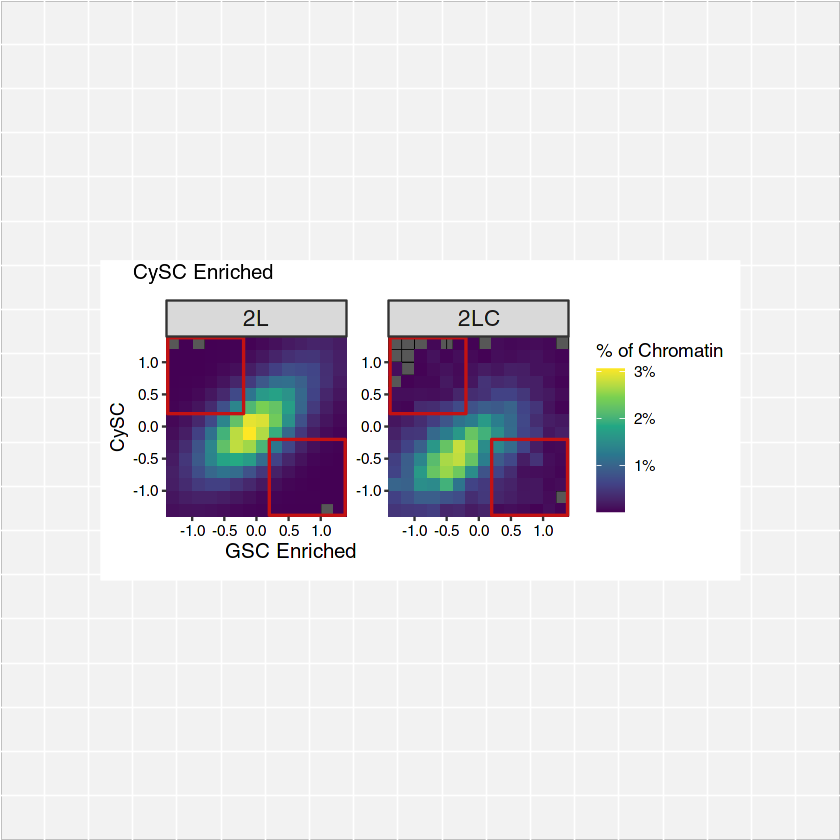

In [18]:
library(egg)
library(grid)
library(gtable)
grob <- set_panel_size(gg, w=unit(1.5, "in"), h=unit(1.5, "in"))
grob$heights[c(1, 13)] <- unit(24, "pt")
grob <- grob %>%
  gtable_add_grob(
    list(
      textGrob("CySC Enriched", 0, unit(22, "pt"), gp = gpar(fontfamily = "Helvetica"), hjust = 0, vjust = 1),
      textGrob("GSC Enriched", 1, unit(22, "pt"), gp = gpar(fontfamily = "Helvetica"), hjust = 1, vjust = 1)
    ),
    t = c(1, 13),
    l = 4,
    r = 7
  )
plot(grob)

[1] 1.114876


Warning message:
“Removed 23459 rows containing non-finite values (`stat_bin2d()`).”
Warning message:
“Removed 29 rows containing missing values (`geom_tile()`).”
Warning message:
“Removed 23459 rows containing non-finite values (`stat_bin2d()`).”
Warning message:
“Removed 29 rows containing missing values (`geom_tile()`).”


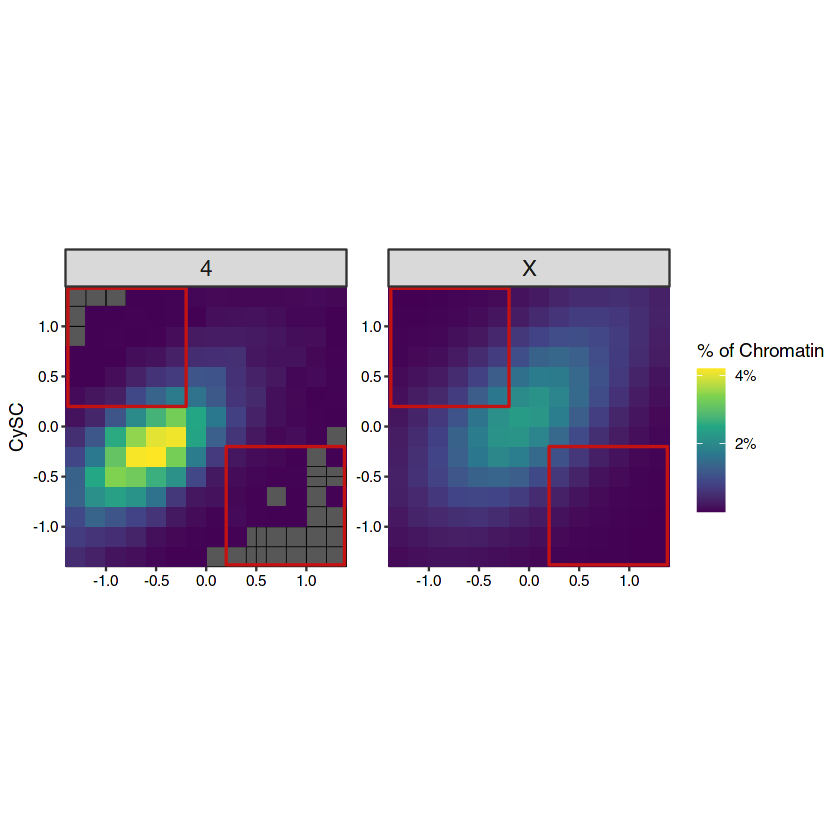

In [19]:
data_H3K4 <- subset(
  data$H3K4,
  region %in% c("4", "X") &
    between(abs(GSC), 1e-6, 9.9) &
    between(abs(CySC), 1e-6, 9.9)
)
plot_limits <- 1.401
annotate_polygon <- 1.38
correction_factor <- with(
  data_H3K4,
  1 / mean(between(GSC, -plot_limits, plot_limits) & between(CySC, -plot_limits, plot_limits))
)
print(correction_factor)
gg4 <- ggplot(data_H3K4, aes(GSC, CySC, fill = after_stat(density))) +
  geom_bin2d(binwidth = 0.2) +
  facet_wrap(vars(region), scales = "free") +
  scale_fill_viridis_c(
    "% of Chromatin",
    breaks = c(0.02, 0.04) / correction_factor,
    labels = \(v) scales::percent(round(v * correction_factor, 2))
  ) +
  annotate(
    "polygon",
    c(-annotate_polygon, -0.2, -0.2, -annotate_polygon),
    c(annotate_polygon, annotate_polygon, 0.2, 0.2),
    fill = "transparent",
    color = "#c41212",
    linewidth = 2 * 25.4 / 72,
  ) +
  annotate(
    "polygon",
    c(annotate_polygon, 0.2, 0.2, annotate_polygon),
    c(-annotate_polygon, -annotate_polygon, -0.2, -0.2),
    fill = "transparent",
    color = "#c41212",
    linewidth = 2 * 25.4 / 72,
  ) +
  scale_x_continuous(
    limits = c(-plot_limits, plot_limits), expand=c(0, 0),
    minor_breaks = seq(-1.4, 1.4, by=0.2)
  ) +
  scale_y_continuous(
    limits = c(-plot_limits, plot_limits), expand=c(0, 0),
    minor_breaks = seq(-1.4, 1.4, by=0.2)
  ) +
  coord_cartesian(c(-1.4,1.4), c(-1.4,1.4), clip="off") +
  labs(x = NULL) +
  theme(
    aspect.ratio = 1,
    panel.background = element_rect(fill = "#575757"),
    panel.grid = element_line(color = "black", linewidth = 0.5 * 25.4 / 72),
    panel.grid.minor = element_line(color = "black", linewidth = 0.5 * 25.4 / 72),
    panel.border = element_blank(),
  )
grob4 <- set_panel_size(gg4, w = unit(1.5, "in"), h = unit(1.5, "in"))
gg4

In [20]:
contingency_data <- data$H3K4 %>%
  group_by(region) %>%
  reframe(
    tribble(
      ~celltype, ~value,
      "GSC", mean(GSC >= 0.2 & CySC <= -0.2),
      "CySC", mean(GSC <= -0.2 & CySC >= 0.2),
    )
  )
print(contingency_data)

# A tibble: 22 × 3
   region celltype  value
   <fct>  <chr>     <dbl>
 1 2L     GSC      0.0346
 2 2L     CySC     0.0413
 3 2LC    GSC      0.0742
 4 2LC    CySC     0.0316
 5 2RC    GSC      0.0539
 6 2RC    CySC     0.0332
 7 2R     GSC      0.0369
 8 2R     CySC     0.0346
 9 3L     GSC      0.0315
10 3L     CySC     0.0443
# ℹ 12 more rows


In [21]:
contingency_data_K27 <- data$H3K27 %>%
  group_by(region) %>%
  reframe(
    tribble(
      ~celltype, ~value,
      "GSC", mean(GSC >= 0.2 & CySC <= -0.2),
      "CySC", mean(GSC <= -0.2 & CySC >= 0.2),
    )
  )

In [27]:
print(
  chromatin_L2FC_K4 <-
    contingency_data %>% group_by(region) %>% summarise(L2FC = log(value[1] / value[2]) / log(2))
)

# A tibble: 11 × 2
   region    L2FC
   <fct>    <dbl>
 1 2L     -0.253 
 2 2LC     1.23  
 3 2RC     0.698 
 4 2R      0.0902
 5 3L     -0.490 
 6 3LC     0.564 
 7 3RC    -0.600 
 8 3R      0.195 
 9 4      -2.79  
10 X      -1.17  
11 Y      -0.933 


In [28]:
print(
  chromatin_L2FC_K27 <-
    contingency_data_K27 %>% group_by(region) %>% summarise(L2FC = log(value[1] / value[2]) / log(2))
)

# A tibble: 11 × 2
   region   L2FC
   <fct>   <dbl>
 1 2L      0.442
 2 2LC     1.20 
 3 2RC     1.21 
 4 2R      1.21 
 5 3L      0.383
 6 3LC     0.970
 7 3RC     0.415
 8 3R      1.17 
 9 4      -3.25 
10 X      -0.750
11 Y      -0.410


In [23]:
log(1.5) / log(2)

[1] 0.5849625

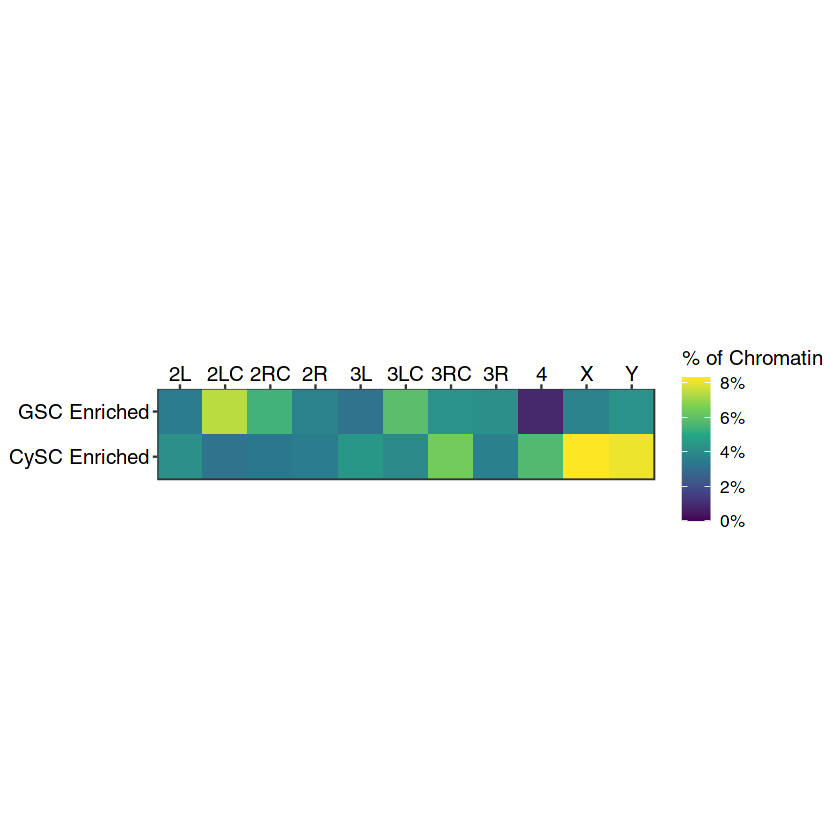

In [24]:
gg_contingency_H3K4 <- ggplot(
  contingency_data %>% subset(region != "rDNA"),
  aes(region, celltype, fill=value)
) +
  geom_tile() +
  # scale_fill_viridis_c(option = "magma", direction = -1, begin = 0.4, limits = c(0, NA))
  scale_fill_viridis_c("% of Chromatin", limits = c(0, NA), labels = scales::percent) +
  scale_x_discrete(position = "top") +
  scale_y_discrete(labels = \(v) paste0(v, " Enriched")) +
  coord_cartesian(expand = F) +
  labs(x = NULL, y = NULL) +
  theme(
    aspect.ratio = 2/11,
    axis.text = element_text(size = unit(12, "pt")),
    legend.title = element_text(size = unit(12, "pt")),
    legend.text = element_text(size = unit(10, "pt")),
  )
gg_contingency_H3K4 

# Recapitulate Fig6 Repliseq Z-Score Analysis

In [60]:
tar_load(chic.tile.diameter_1000_chr)
tar_load(matches("repli.timing_.*chr$"))
tar_load(chromosome_pericetromere_label)

Y <- tibble(
  chr = names(chr.lengths),
  xmin = 2500,
  xmax = floor((chr.lengths - 2500) / 5000) * 5000,
  Germline = list(repli.timing_Germline_chr),
  Somatic = list(repli.timing_Somatic_chr),
  Kc167 = list(repli.timing_Kc167_chr),
  S2 = list(repli.timing_S2_chr),
) %>%
  group_by(chr, xmin, xmax) %>%
  reframe(
    x = seq(xmin, xmax, by = 5000),
    region = (
      as.character(chr) %>%
        paste0(
          replace(
            rep("", length(x)),
            chromosome_pericetromere_label %>%
              findOverlaps(
                GRanges(
                  chr,
                  IRanges(x, width=1),
                  seqlengths = seqlengths(repli.timing_Germline_chr)
                )
              ) %>%
              to(),
            "C"
          )
        ) %>%
      factor(
        c("2L", "2LC", "2RC", "2R", "3L", "3LC", "3RC", "3R", "4", "X", "Y", "rDNA")
      )
    ),
    across(
      !matches("^(x|region)$"),
      list(
        LOESS = ~ (
          loess(
            y.track ~ x.track,
            tibble(
              x.track = .x[[1]][seqnames(.x[[1]]) == chr] %>% mid(),
              y.track = .x[[1]][seqnames(.x[[1]]) == chr]$score,
            ),
            span = 0.025
          ) %>%
          predict(tibble(x.track = x))
        )
      )
    )
  ) %>%
  subset(select = -c(xmin, xmax))
YMEAN <- Y %>%
  group_by(region) %>%
  summarise(across(matches("LOESS"), mean))

YS <- Y[
  c("Germline_LOESS", "Somatic_LOESS", "Kc167_LOESS", "S2_LOESS")
] %>%
  as.matrix() %>%
  scale() %>%
  t() %>%
  scale() %>%
  t()
YS[Y$chr == "Y", ] <- (
  YS[Y$chr == "Y", c(1, 2, 4)] %>%
    t() %>%
    scale() %>%
    t() %>%
    `%*%`(
      matrix(
        c(
          1, 0, 0,
          0, 1, 0,
          0, 0, 0,
          0, 0, 1
        ),
        nrow = 3,
        dimnames = list(
          NULL,
          colnames(Y)[4:7]
        )
      )
    )
)

FEATURES <- YS %>%
  apply(
    2,
    \(v) v %>% split(Y$region) %>% sapply(mean)
  )
FEATURES

,Germline_LOESS,Somatic_LOESS,Kc167_LOESS,S2_LOESS
2L,0.06064009,-0.048755956,-0.02429616,0.01241202
2LC,0.68826892,-0.748531322,0.70889380,-0.64863139
2RC,0.01494543,0.003644133,0.36928399,-0.38787356
2R,-0.01383416,-0.058838867,0.16222834,-0.08955531
3L,-0.01269308,0.038936053,0.11889386,-0.14513683
3LC,0.10516248,-0.200182011,0.25967498,-0.16465545
3RC,-0.16506561,0.975838625,-0.01689792,-0.79387510
3R,0.23270209,-0.296318326,0.01765095,0.04596528
4,0.59402918,-0.273144815,0.44473418,-0.76561854
X,-0.21762039,0.327020066,-0.49483134,0.38543166


In [61]:
YMEAN

region,Germline_LOESS,Somatic_LOESS,Kc167_LOESS,S2_LOESS
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
2L,0.10129805,0.003183193,0.03130882,0.05056826
2LC,-0.05306182,-0.514065315,-0.15777982,-0.36052541
2RC,-0.29591804,-0.458241403,-0.40011716,-0.38930299
2R,0.23967219,0.152886800,0.24794941,0.15574979
3L,0.14439838,0.098151426,0.14218525,0.08043393
3LC,-0.34338030,-0.563059510,-0.57080127,-0.40825779
3RC,-0.53923712,-0.405392822,-0.83280778,-0.66587353
3R,0.16859559,0.012230081,0.08402932,0.07357443
4,0.58647428,0.304579073,0.53772555,0.15757925


# Analyze Repliseq & Chromatin Mark Classification

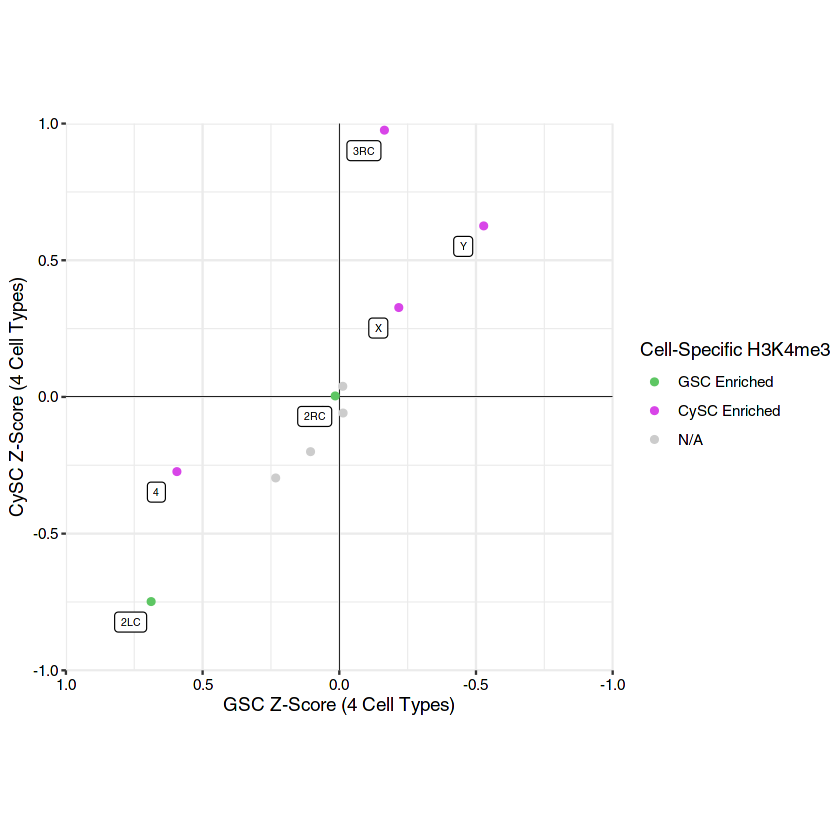

In [84]:
gg_association_H3K4 <- ggplot(
  tibble(chromatin_L2FC_K4, plot_as_zscore = TRUE),
  aes(Germline_LOESS, Somatic_LOESS, color=Classification)
) +
  annotate(
    "segment",
    c(-Inf, 0),
    c(0, -Inf),
    xend = c(Inf, 0),
    yend = c(0, Inf),
    linewidth = 0.5 * 25.4 / 72,
  ) +
  geom_point(
    data = \(data) tibble(
      data,
      Classification = structure(
        as.numeric(cut(L2FC, c(-Inf, -log(1.5) / log(2), log(1.5) / log(2), Inf))),
        levels = c("CySC Enriched", "N/A", "GSC Enriched"),
        class = "factor"
      ) %>%
        relevel("GSC Enriched"),
      as_tibble(
        if (plot_as_zscore[1]) FEATURES[1:11, 1:2] else YMEAN[1:11, 2:3]
      )
    )
  ) +
  geom_label(
    aes(
      Germline_LOESS + 0.075,
      Somatic_LOESS - 0.075,
      label = region, color = NULL
    ),
    data = \(data) tibble(
      data,
      as_tibble(
        if (plot_as_zscore[1]) FEATURES[1:11, 1:2] else YMEAN[1:11, 2:3]
      )
    ) %>%
      subset(abs(L2FC) >= log(1.5) / log(2)),
    size = 6 * 25.4 / 72,
    color = "black"
  ) +
  scale_color_manual(
    values = c(
      "GSC Enriched" = chic_line_track_colors$germline,
      "CySC Enriched" = chic_line_track_colors$somatic,
      "N/A" = "#cccccc"
    )
  ) +
  labs(
    x = "GSC Z-Score (4 Cell Types)",
    y = "CySC Z-Score (4 Cell Types)"
  ) +
  coord_cartesian(c(1, -1), c(-1, 1), ex=F) +
  guides(color = guide_legend("Cell-Specific H3K4me3")) +
  theme(
    aspect.ratio = 1,
    panel.border = element_rect(color = "transparent"),
  )
print(gg_association_H3K4)

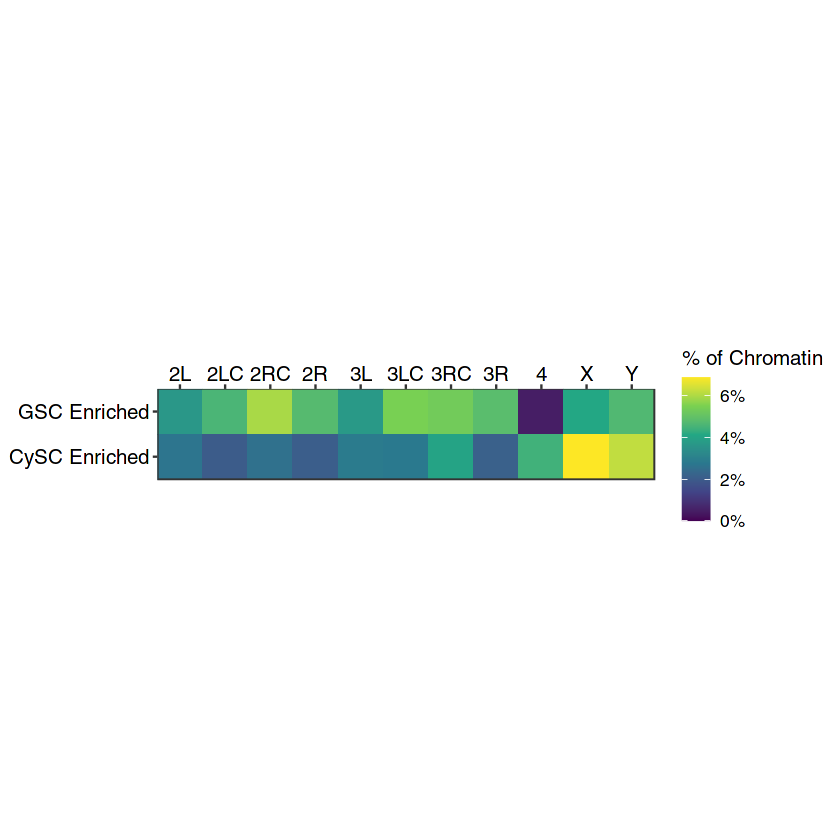

In [78]:
gg_contingency_H3K27 <- ggplot(
  contingency_data_K27 %>% subset(region != "rDNA"),
  aes(region, celltype, fill=value)
) +
  geom_tile() +
  # scale_fill_viridis_c(option = "magma", direction = -1, begin = 0.4, limits = c(0, NA))
  scale_fill_viridis_c("% of Chromatin", limits = c(0, NA), labels = scales::percent) +
  scale_x_discrete(position = "top") +
  scale_y_discrete(labels = \(v) paste0(v, " Enriched")) +
  coord_cartesian(expand = F) +
  labs(x = NULL, y = NULL) +
  theme(
    aspect.ratio = 2/11,
    axis.text = element_text(size = unit(12, "pt")),
    legend.title = element_text(size = unit(12, "pt")),
    legend.text = element_text(size = unit(10, "pt")),
  )
gg_contingency_H3K27

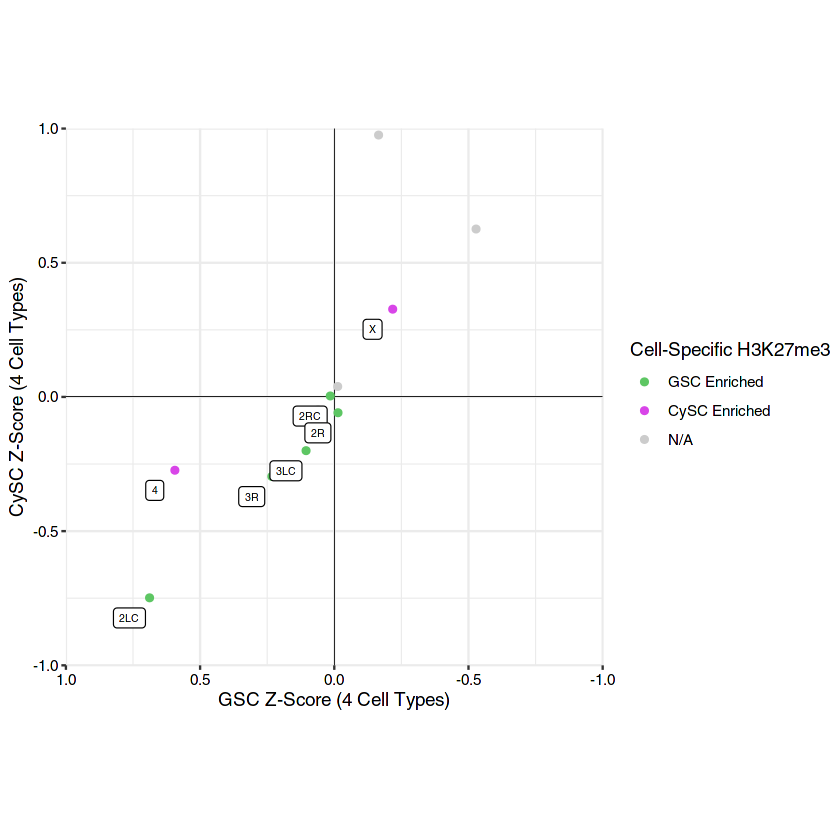

In [91]:
gg_association_H3K27 <- gg_association_H3K4 + guides(color = guide_legend("Cell-Specific H3K27me3"))
gg_association_H3K27$data <- tibble(chromatin_L2FC_K27, plot_as_zscore = TRUE)
print(gg_association_H3K27)

# Paneled Gene Profile - Gene Body Heatmap

In [97]:
tar_load(sc_active_data_Somatic_Paneled)
tail(unique(sc_active_data_Somatic_Paneled$pos))

[1] "81%" "82%" "83%" "84%" "85%" "86%" "87%" "88%" "89%" "90%" "91%" "92%"
[13] "93%" "94%" "95%" "96%" "97%" "98%" "99%" "TES"

In [135]:
dim(sc_active_data_Somatic_Paneled)

[1] 12606     6

In [106]:
tar_load(chic.experiment.tss.heatmaps_Somatic_Paneled)
tar_load(facet_genes_Somatic_Paneled)
print(names(chic.experiment.tss.heatmaps_Somatic_Paneled))
head(facet_genes_Somatic_Paneled)

[1] "H3K4me3"  "H3K27me3" "H3K9me3" 


facet,quant,activity,repli,repli.active,gene
<fct>,<fct>,<fct>,<fct>,<fct>,<chr>
X,low,active,EM,MLA,lncRNA:CR40469
X,off,off,EM,NA,CG17636
X,med,active,EM,MLA,RhoGAP1A
X,off,off,E,NA,mir-4915
X,low,active,E,EA,tyn
X,med,active,EM,MLA,lncRNA:CR45473


In [105]:
sort(sample(colnames(chic.experiment.tss.heatmaps_Somatic_Paneled$H3K27me3), 100))
summary(chic.experiment.tss.heatmaps_Somatic_Paneled$H3K27me3[, "50%"])

[1] "-104" "-107" "-12"  "-132" "-138" "-146" "-164" "-175" "-177" "-212"
 [11] "-221" "-229" "-238" "-240" "-249" "-250" "-253" "-260" "-263" "-270"
 [21] "-272" "-289" "-292" "-304" "-322" "-325" "-333" "-337" "-347" "-35" 
 [31] "-363" "-37"  "-388" "-421" "-445" "-449" "-452" "-455" "-485" "-487"
 [41] "-488" "-492" "-56"  "-57"  "-67"  "-73"  "-9"   "1"    "105"  "121" 
 [51] "130"  "143"  "166"  "17%"  "18"   "192"  "2%"   "219"  "22%"  "224" 
 [61] "224"  "227"  "252"  "255"  "258"  "267"  "268"  "276"  "28"   "301" 
 [71] "326"  "351"  "355"  "367"  "374"  "379"  "388"  "392"  "396"  "399" 
 [81] "412"  "444"  "463"  "472"  "479"  "482"  "499"  "499"  "50"   "55"  
 [91] "63"   "68"   "7%"   "70"   "74"   "81"   "81%"  "92"   "92%"  "95%"

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max.      NA's 
   0.0010    0.4108    1.3089    2.4034    3.0089 1024.0000        78 

In [147]:
profiles <- cbind(
  facet_genes_Somatic_Paneled[3],
  as.data.frame(chic.experiment.tss.heatmaps_Somatic_Paneled$H3K27me3[facet_genes_Somatic_Paneled$gene, ]),
  Classification = ifelse(chic.experiment.tss.heatmaps_Somatic_Paneled$H3K27me3[facet_genes_Somatic_Paneled$gene, "50%"] >= 2, "K27Rich", "Others")
) %>%
  subset(activity == "active", select = -activity) %>%
  group_by(Classification) %>%
  summarise_all(mean)
profiles[, 1:10] %>% head()
profile_plot <- melt(as.matrix(column_to_rownames(profiles, "Classification")))
colnames(profile_plot) <- c("Classification", "pos", "value")
profile_plot <- tibble(
  profile_plot %>% subset(select = -pos),
  pos = subset(
    sc_active_data_Somatic_Paneled,
    mark == "H3K4me3"
  )$pos,
  x = subset(
    sc_active_data_Somatic_Paneled,
    mark == "H3K4me3"
  )$x
)

Classification,-500,-499,-498,-497,-496,-495,-494,-493,-492
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
K27Rich,1.677299,1.661515,1.646271,1.630323,1.615647,1.602145,1.58992,1.577787,1.565700
Others,1.619462,1.608392,1.596877,1.586287,1.577482,1.567935,1.55825,1.549239,1.539397


In [155]:
head(facet_genes_Somatic_Paneled)

facet,quant,activity,repli,repli.active,gene
<fct>,<fct>,<fct>,<fct>,<fct>,<chr>
X,low,active,EM,MLA,lncRNA:CR40469
X,off,off,EM,NA,CG17636
X,med,active,EM,MLA,RhoGAP1A
X,off,off,E,NA,mir-4915
X,low,active,E,EA,tyn
X,med,active,EM,MLA,lncRNA:CR45473


In [157]:
tibble(
    facet_genes_Somatic_Paneled,
    Classification = ifelse(chic.experiment.tss.heatmaps_Somatic_Paneled$H3K27me3[genes, "50%"] >= 2, "K27Rich", "Others"),
    genes = gene
  )

ERROR: Error: object 'genes' not found


In [168]:
Z <- chic.experiment.tss.heatmaps_Somatic_Paneled$H3K27me3 %>%
    `attr<-`(
      "x",
      value = subset(
        sc_active_data_Somatic_Paneled,
        mark == "H3K4me3" & activity == "active"
      )$x
    )
attr(Z, "x")

[1] -500 -499 -498 -497 -496 -495 -494 -493 -492 -491 -490 -489 -488 -487
  [15] -486 -485 -484 -483 -482 -481 -480 -479 -478 -477 -476 -475 -474 -473
  [29] -472 -471 -470 -469 -468 -467 -466 -465 -464 -463 -462 -461 -460 -459
  [43] -458 -457 -456 -455 -454 -453 -452 -451 -450 -449 -448 -447 -446 -445
  [57] -444 -443 -442 -441 -440 -439 -438 -437 -436 -435 -434 -433 -432 -431
  [71] -430 -429 -428 -427 -426 -425 -424 -423 -422 -421 -420 -419 -418 -417
  [85] -416 -415 -414 -413 -412 -411 -410 -409 -408 -407 -406 -405 -404 -403
  [99] -402 -401 -400 -399 -398 -397 -396 -395 -394 -393 -392 -391 -390 -389
 [113] -388 -387 -386 -385 -384 -383 -382 -381 -380 -379 -378 -377 -376 -375
 [127] -374 -373 -372 -371 -370 -369 -368 -367 -366 -365 -364 -363 -362 -361
 [141] -360 -359 -358 -357 -356 -355 -354 -353 -352 -351 -350 -349 -348 -347
 [155] -346 -345 -344 -343 -342 -341 -340 -339 -338 -337 -336 -335 -334 -333
 [169] -332 -331 -330 -329 -328 -327 -326 -325 -324 -323 -322 -321 -320 -319
 [183] -318 -317 -316 -315 -314 -313 -312 -311 -310 -309 -308 -307 -306 -305
 [197] -304 -303 -302 -301 -300 -299 -298 -297 -296 -295 -294 -293 -292 -291
 [211] -290 -289 -288 -287 -286 -285 -284 -283 -282 -281 -280 -279 -278 -277
 [225] -276 -275 -274 -273 -272 -271 -270 -269 -268 -267 -266 -265 -264 -263
 [239] -262 -261 -260 -259 -258 -257 -256 -255 -254 -253 -252 -251 -250 -249
 [253] -248 -247 -246 -245 -244 -243 -242 -241 -240 -239 -238 -237 -236 -235
 [267] -234 -233 -232 -231 -230 -229 -228 -227 -226 -225 -224 -223 -222 -221
 [281] -220 -219 -218 -217 -216 -215 -214 -213 -212 -211 -210 -209 -208 -207
 [295] -206 -205 -204 -203 -202 -201 -200 -199 -198 -197 -196 -195 -194 -193
 [309] -192 -191 -190 -189 -188 -187 -186 -185 -184 -183 -182 -181 -180 -179
 [323] -178 -177 -176 -175 -174 -173 -172 -171 -170 -169 -168 -167 -166 -165
 [337] -164 -163 -162 -161 -160 -159 -158 -157 -156 -155 -154 -153 -152 -151
 [351] -150 -149 -148 -147 -146 -145 -144 -143 -142 -141 -140 -139 -138 -137
 [365] -136 -135 -134 -133 -132 -131 -130 -129 -128 -127 -126 -125 -124 -123
 [379] -122 -121 -120 -119 -118 -117 -116 -115 -114 -113 -112 -111 -110 -109
 [393] -108 -107 -106 -105 -104 -103 -102 -101 -100  -99  -98  -97  -96  -95
 [407]  -94  -93  -92  -91  -90  -89  -88  -87  -86  -85  -84  -83  -82  -81
 [421]  -80  -79  -78  -77  -76  -75  -74  -73  -72  -71  -70  -69  -68  -67
 [435]  -66  -65  -64  -63  -62  -61  -60  -59  -58  -57  -56  -55  -54  -53
 [449]  -52  -51  -50  -49  -48  -47  -46  -45  -44  -43  -42  -41  -40  -39
 [463]  -38  -37  -36  -35  -34  -33  -32  -31  -30  -29  -28  -27  -26  -25
 [477]  -24  -23  -22  -21  -20  -19  -18  -17  -16  -15  -14  -13  -12  -11
 [491]  -10   -9   -8   -7   -6   -5   -4   -3   -2   -1    0    1    2    3
 [505]    4    5    6    7    8    9   10   11   12   13   14   15   16   17
 [519]   18   19   20   21   22   23   24   25   26   27   28   29   30   31
 [533]   32   33   34   35   36   37   38   39   40   41   42   43   44   45
 [547]   46   47   48   49   50   51   52   53   54   55   56   57   58   59
 [561]   60   61   62   63   64   65   66   67   68   69   70   71   72   73
 [575]   74   75   76   77   78   79   80   81   82   83   84   85   86   87
 [589]   88   89   90   91   92   93   94   95   96   97   98   99  100  101
 [603]  102  103  104  105  106  107  108  109  110  111  112  113  114  115
 [617]  116  117  118  119  120  121  122  123  124  125  126  127  128  129
 [631]  130  131  132  133  134  135  136  137  138  139  140  141  142  143
 [645]  144  145  146  147  148  149  150  151  152  153  154  155  156  157
 [659]  158  159  160  161  162  163  164  165  166  167  168  169  170  171
 [673]  172  173  174  175  176  177  178  179  180  181  182  183  184  185
 [687]  186  187  188  189  190  191  192  193  194  195  196  197  198  199
 [701]  200  201  202  203  204  205  206  207  208  209  210  211  212  213
 [715]  214  215  216  217  218  219  220  221  222  223  224  225  226  227

In [230]:
library(matrixStats)
K27_Classification <- tibble(
  facet_genes_Somatic_Paneled,
  Classification = ifelse(
    rowQuantiles(
      chic.experiment.tss.heatmaps_Somatic_Paneled$H3K27me3[gene, paste0(1:99, "%")],
      probs = 0.25
    ) >=
      1.1,
    "K27Rich", "Others"
  ),
) %>%
  subset(activity == "active")
profiles <- chic_heatmap_facet_genes(
  chic.experiment.tss.heatmaps_Somatic_Paneled$H3K27me3,
  tibble(
    genes = K27_Classification$Classification,
    gene = K27_Classification$gene
  )
)

In [231]:
subset(profiles, pos == "50%")

genes,n,pos,value,x
<chr>,<int>,<chr>,<dbl>,<dbl>
K27Rich,282,50%,3.182439,1500
Others,6476,50%,2.429544,1500


In [248]:
library(forcats)
profiles <- profiles %>%
  mutate(
    genes = genes %>%
      factor() %>%
      fct_relabel(
        \(n) n %>%
          sapply(
            \(n) paste0(
              n,
              " (n = ",
              profiles$n[profiles$genes == n & profiles$pos == "TSS"],
              ")"
            )
          )
      )
  )

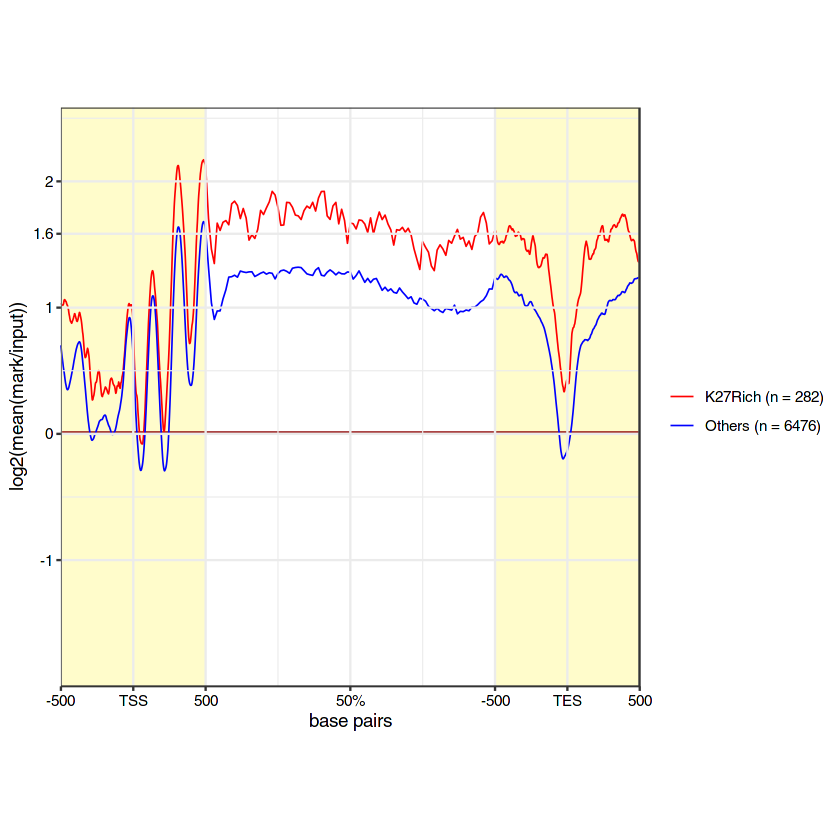

In [249]:
ggk27genes <- chic_plot_paneled_profiles_facet_grid(
  profiles, "", c("red", "blue"), linewidth = rep(1, 2) * 25.4 / 72, faceter=theme(), chic_average_profile_limits = c(0.25, 6)
) %>%
  print()

In [197]:
assay.data.sc <- as_tibble(read.csv("scRNA-seq-Assay-Metadata.csv"))

In [251]:
genes <- list(
  K27Rich = with(
    subset(assay.data.sc, X %in% K27_Classification$gene[grepl("K27Rich", K27_Classification$Classification)] & (end - start) >= 1000),
    GRanges(
      chr,
      IRanges(start + 500, end - 500)
    )
  ),
  Others = with(
    subset(assay.data.sc, X %in% K27_Classification$gene[grepl("Others", K27_Classification$Classification)] & (end - start) >= 1000),
    GRanges(
      chr,
      IRanges(start + 500, end - 500)
    )
  )
)

In [252]:
dim(data$H3K27)
length(gr)

[1] 1375484       3

[1] 1375484

In [253]:
K27_Classification_Data <- sapply(
  genes,
  \(genes) dplyr::slice(
    data$H3K27,
    to(
      findOverlaps(
        genes,
        gr
      )
    )
  ),
  simplify=FALSE
)
sapply(K27_Classification_Data, dim, simplify=F)

$K27Rich
[1] 8953    3

$Others
[1] 470342      3

Warning message:
“Removed 33186 rows containing non-finite values (`stat_bin2d()`).”
Warning message:
“Removed 23 rows containing missing values (`geom_tile()`).”


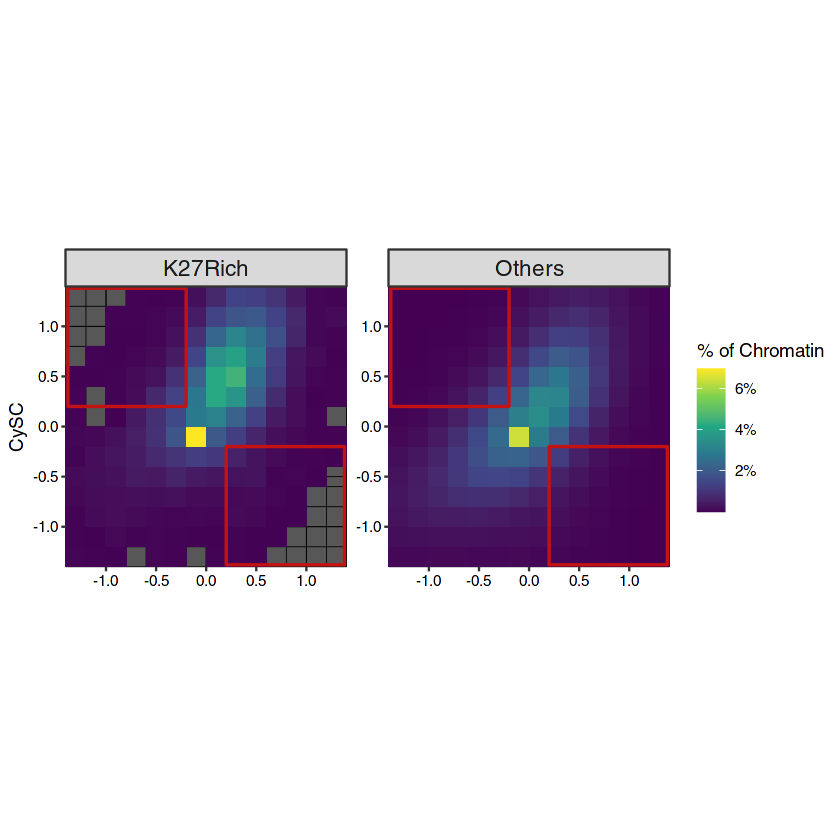

In [259]:
gggeneschromatin <- ggplot(bind_rows(K27_Classification_Data, .id = "CDS"), aes(GSC, CySC, fill = after_stat(density))) +
  geom_bin2d(binwidth = 0.2) +
  facet_wrap(vars(CDS), scales = "free") +
  scale_fill_viridis_c(
    "% of Chromatin",
    breaks = c(0.02, 0.04, 0.06, 0.08) / correction_factor,
    labels = \(v) scales::percent(round(v * correction_factor, 2))
  ) +
  annotate(
    "polygon",
    c(-annotate_polygon, -0.2, -0.2, -annotate_polygon),
    c(annotate_polygon, annotate_polygon, 0.2, 0.2),
    fill = "transparent",
    color = "#c41212",
    linewidth = 2 * 25.4 / 72,
  ) +
  annotate(
    "polygon",
    c(annotate_polygon, 0.2, 0.2, annotate_polygon),
    c(-annotate_polygon, -annotate_polygon, -0.2, -0.2),
    fill = "transparent",
    color = "#c41212",
    linewidth = 2 * 25.4 / 72,
  ) +
  scale_x_continuous(
    limits = c(-plot_limits, plot_limits), expand=c(0, 0),
    minor_breaks = seq(-1.4, 1.4, by=0.2)
  ) +
  scale_y_continuous(
    limits = c(-plot_limits, plot_limits), expand=c(0, 0),
    minor_breaks = seq(-1.4, 1.4, by=0.2)
  ) +
  coord_cartesian(c(-1.4,1.4), c(-1.4,1.4), clip="off") +
  labs(x = NULL) +
  theme(
    aspect.ratio = 1,
    panel.background = element_rect(fill = "#575757"),
    panel.grid = element_line(color = "black", linewidth = 0.5 * 25.4 / 72),
    panel.grid.minor = element_line(color = "black", linewidth = 0.5 * 25.4 / 72),
    panel.border = element_blank(),
  )
gggeneschromatin 

# Export GG Objects

In [268]:
pdf("illustrations/Histone-Cell-Type-Percentage.pdf", 11, 8.5)
gtable(
  unit(11, "in"),
  unit(c(2.5, 2.5, 2.5), "in")
) %>%
  gtable_add_grob(
    list(
      grob,
      set_panel_size(gg_contingency_H3K4, w = unit(4, "in"), h = unit(4*2/11, "in")),
      cbind(
        set_panel_size(
          gg_association_H3K4,
          w = unit(2, "in"),
          h = unit(2, "in")
        ),
        set_panel_size(
          {
            gg <- gg_association_H3K4
            gg$data <- mutate(gg$data, plot_as_zscore = FALSE)
            gg + labs(x = "GSC Timing Value", y = "CySC Timing Value")
          },
          w = unit(2, "in"),
          h = unit(2, "in")
        )
      )
    ),
    t = 1:3,
    l = 1
  ) %>%
  grid.draw()
grid.draw(
  textGrob(
    "H3K4me3 Enrichment",
    unit(5.5, "pt"),
    unit(8.5 * 72 - 5.5, "pt"),
    hjust = 0,
    vjust = 1,
    gp = gpar(fontfamily = "Helvetica", fontsize = 24)
  )
)
grid.newpage()

gtable(
  unit(11, "in"),
  unit(c(2.5, 2.5, 2.5), "in")
) %>%
  gtable_add_grob(
    list(
      grobK27,
      set_panel_size(gg_contingency_H3K27, w = unit(4, "in"), h = unit(4*2/11, "in")),
      cbind(
        set_panel_size(
          gg_association_H3K27,
          w = unit(2, "in"),
          h = unit(2, "in")
        ),
        set_panel_size(
          {
            gg <- gg_association_H3K27
            gg$data <- mutate(gg$data, plot_as_zscore = FALSE)
            gg + labs(x = "GSC Timing Value", y = "CySC Timing Value")
          },
          w = unit(2, "in"),
          h = unit(2, "in")
        )
      )
    ),
    t = 1:3,
    l = 1
  ) %>%
  grid.draw()
grid.draw(
  textGrob(
    "H3K27me3 Enrichment",
    unit(5.5, "pt"),
    unit(8.5 * 72 - 5.5, "pt"),
    hjust = 0,
    vjust = 1,
    gp = gpar(fontfamily = "Helvetica", fontsize = 24)
  )
)
grid.newpage()
grid.draw(grob4)
grid.draw(
  textGrob(
    "H3K4me3 Enrichment",
    unit(5.5, "pt"),
    unit(8.5 * 72 - 5.5, "pt"),
    hjust = 0,
    vjust = 1,
    gp = gpar(fontfamily = "Helvetica", fontsize = 24)
  )
)

grid.newpage()
grid.draw(
  gtable(unit(c(4, 6), "in"), unit(8, "in")) %>%
    gtable_add_grob(
      list(
        set_panel_size(
          ggk27genes + theme(plot.margin = margin(5.5, 35, 5.5, 5.5)),
          w = unit(2, "in"),
          h = unit(2, "in")
        ),
        set_panel_size(
          gggeneschromatin,
          w = unit(2, "in"),
          h = unit(2, "in")
        )
      ),
      t = 1,
      l = 1:2
    )
)
grid.draw(
  textGrob(
    "CySC H3K27me3 Gene Body Enrichment",
    unit(5.5, "pt"),
    unit(8.5 * 72 - 5.5, "pt"),
    hjust = 0,
    vjust = 1,
    gp = gpar(fontfamily = "Helvetica", fontsize = 24)
  )
)
dev.off()

Warning message:
“Removed 33186 rows containing non-finite values (`stat_bin2d()`).”
Warning message:
“Removed 23 rows containing missing values (`geom_tile()`).”


png 
  2